<a href="https://colab.research.google.com/github/yantiputri/SEMESTER-3/blob/main/tugas4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Praktikum_ml/tugas4'

Mounted at /content/drive


In [5]:
#membaca file csv menggunakan pandas
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Praktikum_ml/tugas4/data/calonpembelimobil.csv')
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [7]:
#cek missing value
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [8]:
#memisahkan variabel x dan y
X = df[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df['Beli_Mobil']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nJumlah Data Latih: {X_train.shape[0]}")
print(f"Jumlah Data Uji: {X_test.shape[0]}")


Jumlah Data Latih: 800
Jumlah Data Uji: 200


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train_scaled, y_train)
print("\nModel Logistic Regression berhasil dilatih.")


Model Logistic Regression berhasil dilatih.


In [12]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("\nHasil Evaluasi Model:")
print(f"Akurasi   : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision : {precision_score(y_test, y_pred):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score  : {f1_score(y_test, y_pred):.4f}")

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))




Hasil Evaluasi Model:
Akurasi   : 0.9300
Precision : 0.9593
Recall    : 0.9291
F1-Score  : 0.9440

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91        73
           1       0.96      0.93      0.94       127

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



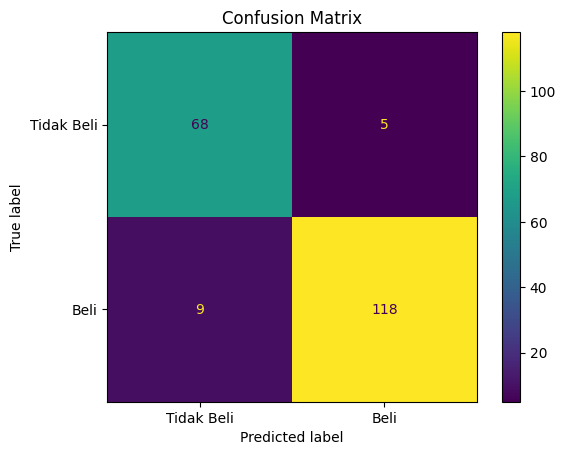

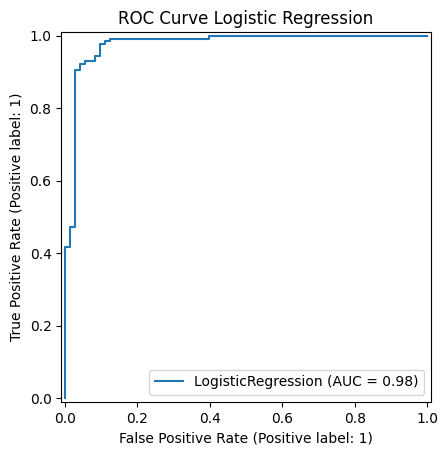

In [13]:
# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                       display_labels=['Tidak Beli', 'Beli']).plot(values_format='d')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC Curve Logistic Regression")
plt.show()

In [15]:
data_baru = pd.DataFrame({
    'Usia': [25, 40, 60],
    'Status': [1, 2, 1],
    'Kelamin': [0, 1, 1],
    'Memiliki_Mobil': [0, 1, 0],
    'Penghasilan': [250, 400, 120]
})

data_baru_scaled = scaler.transform(data_baru)
prediksi_baru = model.predict(data_baru_scaled)
print("\nHasil Prediksi Data Baru (1 = Beli, 0 = Tidak Beli):")
print(prediksi_baru)


Hasil Prediksi Data Baru (1 = Beli, 0 = Tidak Beli):
[1 1 0]


In [16]:
hasil_prediksi = data_baru.copy()
hasil_prediksi['Prediksi_Beli'] = prediksi_baru
hasil_prediksi['Prediksi_Beli'] = hasil_prediksi['Prediksi_Beli'].replace({
    0: 'Tidak Membeli Mobil',
    1: 'Membeli Mobil'
})
print("\nHasil Prediksi dan Interpretasi")
display(hasil_prediksi)


Hasil Prediksi dan Interpretasi


,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Prediksi_Beli
0,25,1,0,0,250,Membeli Mobil
1,40,2,1,1,400,Membeli Mobil
2,60,1,1,0,120,Tidak Membeli Mobil
